In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
cars = pd.read_csv('/Users/kuba.figura/CS2025/computational_intelligence/car+evaluation/car.data', names =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred'])

In [3]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,pred
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
cars.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
pred        0
dtype: int64

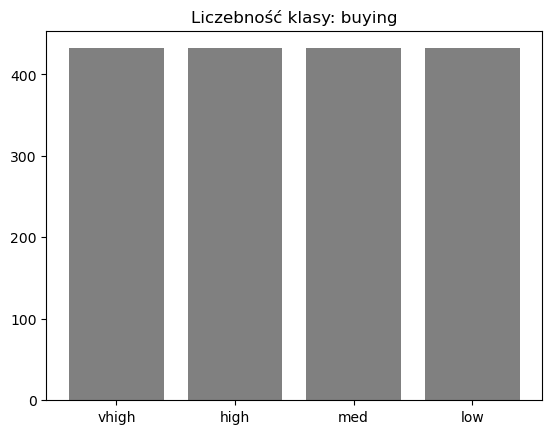

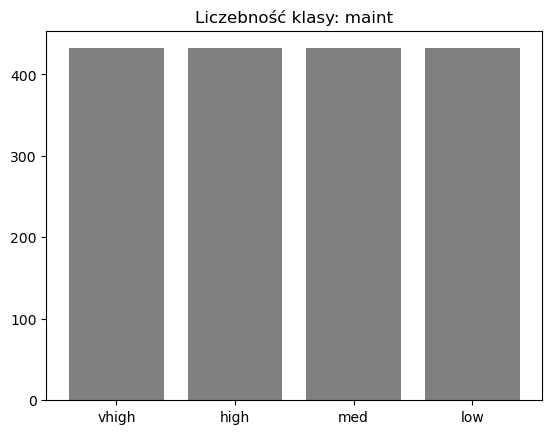

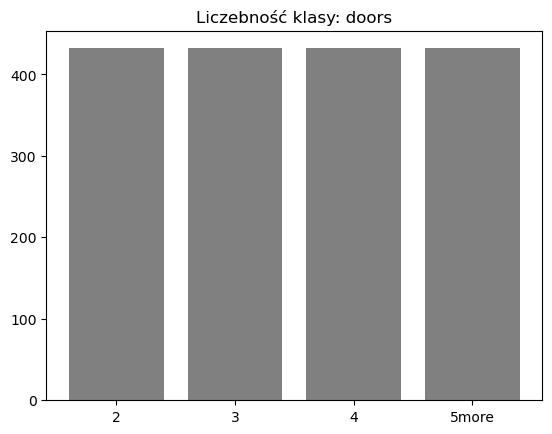

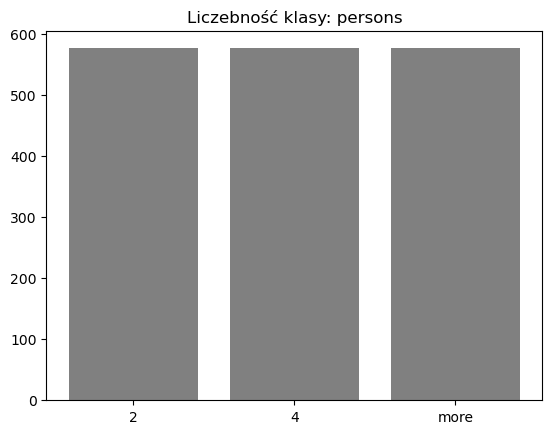

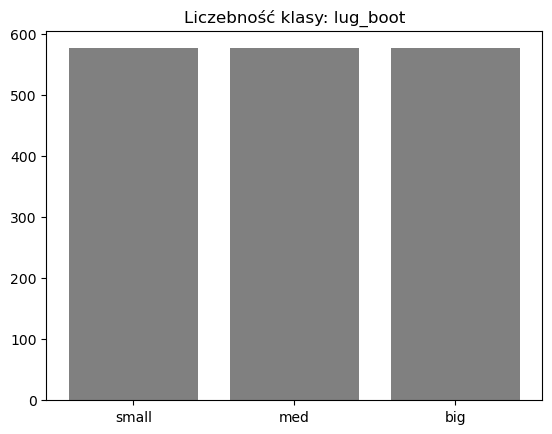

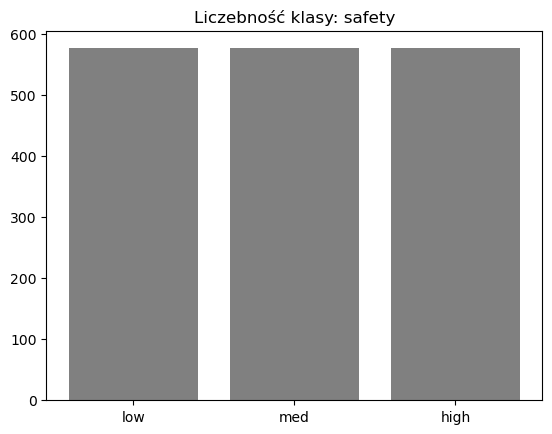

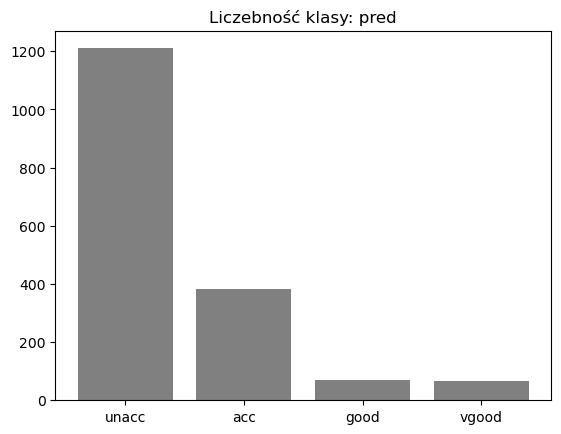

In [5]:
labels = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred']
for label in labels:
    plt.bar(cars[label].value_counts().index, cars[label].value_counts().values, color = "grey")
    plt.title(f"Liczebność klasy: {label}")
    plt.show()

# Wstępna eksploracja
W zbiorze Cars mamy znowu do czynienia z niezrównowzonymi klasami. Trzeba będzie zastosować podobne strategie jak w danych dotyczących złobków.

In [6]:
for label in labels:
    print(f"Wartości w klasie {label}: {cars[label].unique()}")

Wartości w klasie buying: ['vhigh' 'high' 'med' 'low']
Wartości w klasie maint: ['vhigh' 'high' 'med' 'low']
Wartości w klasie doors: ['2' '3' '4' '5more']
Wartości w klasie persons: ['2' '4' 'more']
Wartości w klasie lug_boot: ['small' 'med' 'big']
Wartości w klasie safety: ['low' 'med' 'high']
Wartości w klasie pred: ['unacc' 'acc' 'vgood' 'good']


In [7]:
from sklearn.preprocessing import OrdinalEncoder

buying = ['vhigh', 'high', 'med', 'low']
buying_r = buying[::-1]
maint = ['vhigh', 'high', 'med', 'low']
maint_r = maint[::-1]
doors = ['2', '3', '4', '5more']
persons = ['2', '4', 'more']
lug_boot = ['small', 'med', 'big']
safety = ['low', 'med', 'high']
pred = ['unacc', 'acc', 'good', 'vgood']
ordinal_encoder = OrdinalEncoder(categories=[buying_r, maint_r, doors, persons, lug_boot, safety, pred])

cars[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred']] = ordinal_encoder.fit_transform(cars[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'pred']])


In [8]:
for idx, feature in enumerate(labels):
    categories = ordinal_encoder.categories_[idx]
    print(f"\n{feature.upper()}:")
    print("-" * 40)
    for encoded_value, original_value in enumerate(categories):
        print(f"  {original_value:<15} -> {encoded_value}")

print("\n" + "=" * 60)


BUYING:
----------------------------------------
  low             -> 0
  med             -> 1
  high            -> 2
  vhigh           -> 3

MAINT:
----------------------------------------
  low             -> 0
  med             -> 1
  high            -> 2
  vhigh           -> 3

DOORS:
----------------------------------------
  2               -> 0
  3               -> 1
  4               -> 2
  5more           -> 3

PERSONS:
----------------------------------------
  2               -> 0
  4               -> 1
  more            -> 2

LUG_BOOT:
----------------------------------------
  small           -> 0
  med             -> 1
  big             -> 2

SAFETY:
----------------------------------------
  low             -> 0
  med             -> 1
  high            -> 2

PRED:
----------------------------------------
  unacc           -> 0
  acc             -> 1
  good            -> 2
  vgood           -> 3



# Przygotowanie zbioru testowego, trenigowego i walidacyjnego
Ponieważ zbiory danych są niezbalansowne trzeba zastosować próbkowanie warstwowe.
Podział danych został przeprowadzony według następujących podziałów: 
 - Zbiór treningowy (70%)
 - Zbiór testowy (15%)
 - Zbiór walidacyny (15%)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

y = cars['pred']
X = cars.drop('pred', axis=1)

#klasy są niezbalansowane, więc albo usunięcie albo wprowadzenie wag
# użycie stratify, aby utrzymać proporcje klas w każdym zbiorze
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Kształt zbioru treningowego cech (X_train):", X_train.shape)
print("Kształt zbioru walidacyjnego cech (X_val):", X_val.shape)
print("Kształt zbioru testowego cech (X_test):", X_test.shape)
print("Kształt zbioru treningowego zmiennej docelowej (y_train):", y_train.shape)
print("Kształt zbioru walidacyjnego zmiennej docelowej (y_val):", y_val.shape)
print("Kształt zbioru testowego zmiennej docelowej (y_test):", y_test.shape)


print("\n" + "="*60)
print("ROZKŁAD KLAS W ZBIORACH")
print("="*60)
print("\nCały zbiór:")
print(cars['pred'].value_counts().sort_index())

print("\nZbór treningowy:")
print(y_train.value_counts().sort_index())

print("\nZbór walidacyjny:")
print(y_val.value_counts().sort_index())

print("\nZbór testowy:")
print(y_test.value_counts().sort_index())
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("\n" + "="*60)
print("CLASS WEIGHTS (wagi dla każdej klasy)")
print("="*60)
class_names = ['unacc', 'acc', 'good', 'vgood']
for class_idx, weight in sorted(class_weight_dict.items()):
    print(f"Klasa {int(class_idx)} ({class_names[int(class_idx)]}): {weight:.4f}")

Kształt zbioru treningowego cech (X_train): (1209, 6)
Kształt zbioru walidacyjnego cech (X_val): (259, 6)
Kształt zbioru testowego cech (X_test): (260, 6)
Kształt zbioru treningowego zmiennej docelowej (y_train): (1209,)
Kształt zbioru walidacyjnego zmiennej docelowej (y_val): (259,)
Kształt zbioru testowego zmiennej docelowej (y_test): (260,)

ROZKŁAD KLAS W ZBIORACH

Cały zbiór:
pred
0.0    1210
1.0     384
2.0      69
3.0      65
Name: count, dtype: int64

Zbór treningowy:
pred
0.0    847
1.0    269
2.0     48
3.0     45
Name: count, dtype: int64

Zbór walidacyjny:
pred
0.0    181
1.0     57
2.0     13
3.0      8
Name: count, dtype: int64

Zbór testowy:
pred
0.0    182
1.0     58
2.0      8
3.0     12
Name: count, dtype: int64

CLASS WEIGHTS (wagi dla każdej klasy)
Klasa 0 (unacc): 0.3568
Klasa 1 (acc): 1.1236
Klasa 2 (good): 6.2969
Klasa 3 (vgood): 6.7167


# Tworzenie modelu
Pierwszy model zostal stworzony z zastosowaniem strategii polegającej na przypisaniu wag wszysktim klasom, aby zrekompensować brak zbalansowania.

In [10]:
import tensorflow as tf
import keras
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix

keras.utils.set_random_seed(42)


model = keras.Sequential(
    [
        layers.Dense(20, input_shape = (6,), activation='relu'),
        layers.Dense(5, activation='softmax')
    ]
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


result = model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict  # Dodajemy wagi dla klas
)

print("\n" + "="*60)
print("WYNIKI MODELU BAZOWEGO Z CLASS_WEIGHT")
print("="*60)
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/100
 1/38 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.1250 - loss: 1.5395

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1696 - loss: 1.5823 - val_accuracy: 0.2124 - val_loss: 1.6882
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.2377 - loss: 1.4034 - val_accuracy: 0.2703 - val_loss: 1.5514
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.3112 - loss: 1.2960 - val_accuracy: 0.3707 - val_loss: 1.4212
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.4121 - loss: 1.2091 - val_accuracy: 0.4788 - val_loss: 1.3064
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 1.1348 - val_accuracy: 0.5290 - val_loss: 1.2098
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5660 - loss: 1.0694 - val_accuracy: 0.5714 - val_loss: 1.1265
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.6179 - loss: 1.0130 - val_accuracy: 0.6062 - val_loss: 1.0568
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.6531 - loss: 0.9650 - val_accuracy: 0.6255 - val

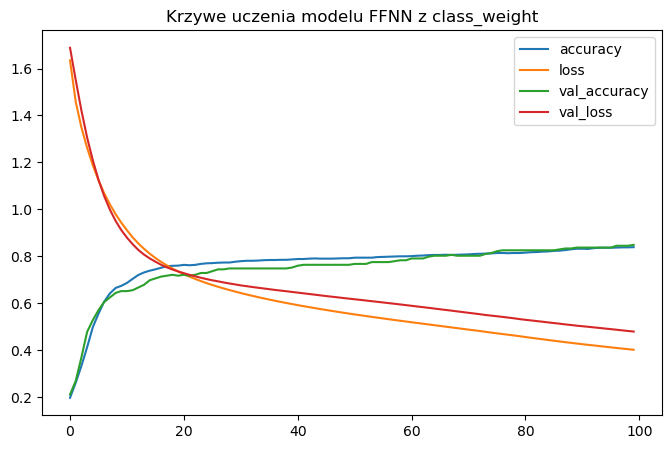

In [11]:
history = pd.DataFrame(data=result.history)
plt.figure(figsize=(8,5))
plt.plot(history)
plt.legend(history.columns)
plt.title("Krzywe uczenia modelu FFNN z class_weight")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Raport klasyfikacji:
              precision    recall  f1-score   support

       unacc       0.95      0.80      0.87       182
         acc       0.71      0.81      0.76        58
        good       0.37      0.88      0.52         8
       vgood       0.50      0.92      0.65        12

    accuracy                           0.81       260
   macro avg       0.63      0.85      0.70       260
weighted avg       0.86      0.81      0.82       260



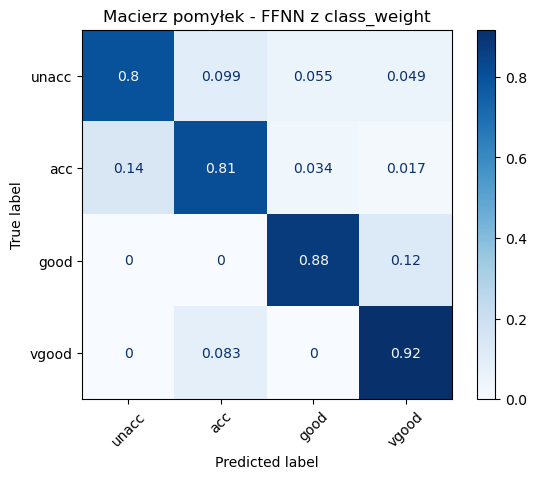

In [12]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(X_test)
mlcm = multilabel_confusion_matrix(y_test, np.argmax(y_pred, axis=1))


y_pred_classes = np.argmax(y_pred, axis=1)
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_classes,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize='true',
    xticks_rotation= 45
)
cm_display.ax_.set_title("Macierz pomyłek - FFNN z class_weight")
plt.show()

In [13]:
import keras_tuner as kt

#strojenie hiperparametrów
def build_model(hp):
    model = keras.Sequential()
    
    
    units_1 = hp.Int('units_1', min_value=10, max_value=100, step=10)
    model.add(layers.Dense(units_1, input_shape=(6,), activation='relu'))
    
    
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    
    add_second_layer = hp.Boolean('add_second_layer')
    if add_second_layer:
        units_2 = hp.Int('units_2', min_value=10, max_value=50, step=10)
        model.add(layers.Dense(units_2, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
   
    model.add(layers.Dense(5, activation='softmax'))
    
    
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    
    if optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='hyperparameter_tuning',
    project_name='nursery_ffnn'
)


print("Uruchamianie hyperparameter tuning z class_weight...\n")
tuner.search(
    X_train, y_train, 
    epochs=50, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=1
)

Reloading Tuner from hyperparameter_tuning/nursery_ffnn/tuner0.json
Uruchamianie hyperparameter tuning z class_weight...



In [14]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Najlepsze hiperparametry:")
print(f"- Liczba neuronów w 1. warstwie: {best_hps.get('units_1')}")
print(f"- Dropout: {best_hps.get('dropout')}")
print(f"- Druga warstwa: {best_hps.get('add_second_layer')}")
if best_hps.get('add_second_layer'):
    print(f"- Liczba neuronów w 2. warstwie: {best_hps.get('units_2')}")
print(f"- Optymalizator: {best_hps.get('optimizer')}")
print(f"- Learning rate: {best_hps.get('learning_rate'):.6f}")

#stworzenie modelu z najlepszymi parametrami
best_model = tuner.hypermodel.build(best_hps)
history_best = best_model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=0
)


print("\n" + "="*60)
print("WYNIKI NAJLEPSZEGO MODELU")
print("="*60)
train_loss, train_accuracy = best_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Najlepsze hiperparametry:
- Liczba neuronów w 1. warstwie: 40
- Dropout: 0.1
- Druga warstwa: True
- Liczba neuronów w 2. warstwie: 40
- Optymalizator: adam
- Learning rate: 0.004098


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



WYNIKI NAJLEPSZEGO MODELU
Train Accuracy: 0.9752
Val Accuracy: 0.9691
Test Accuracy: 0.9769


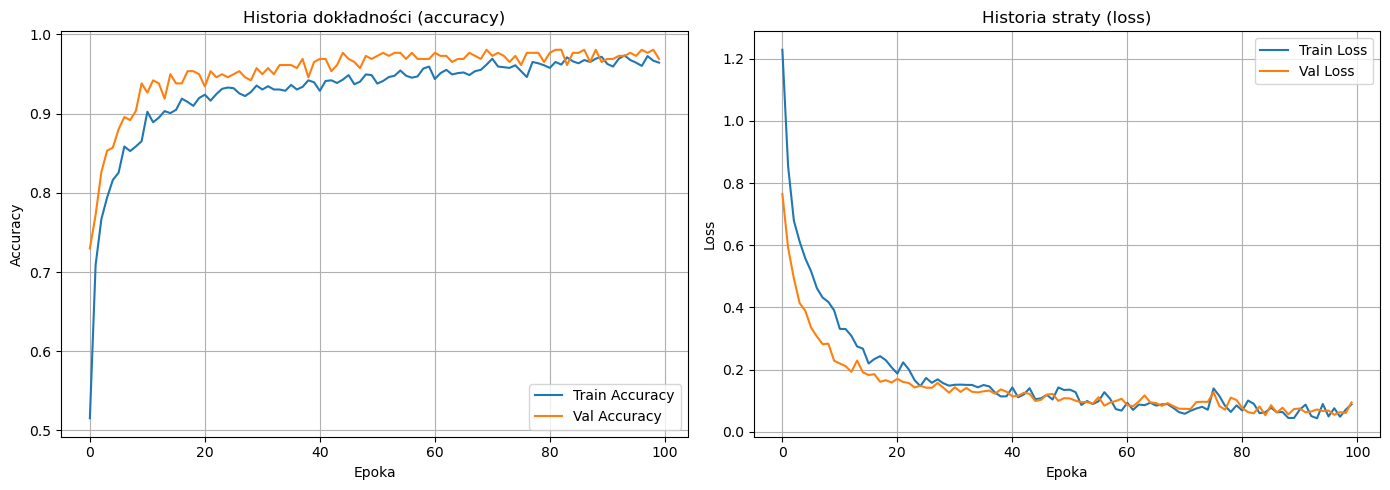

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].plot(history_best.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_best.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Historia dokładności (accuracy)')
axes[0].set_xlabel('Epoka')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)


axes[1].plot(history_best.history['loss'], label='Train Loss')
axes[1].plot(history_best.history['val_loss'], label='Val Loss')
axes[1].set_title('Historia straty (loss)')
axes[1].set_xlabel('Epoka')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Raport klasyfikacji:
              precision    recall  f1-score   support

       unacc       1.00      0.98      0.99       182
         acc       0.95      0.97      0.96        58
        good       0.88      0.88      0.88         8
       vgood       0.86      1.00      0.92        12

    accuracy                           0.98       260
   macro avg       0.92      0.96      0.94       260
weighted avg       0.98      0.98      0.98       260



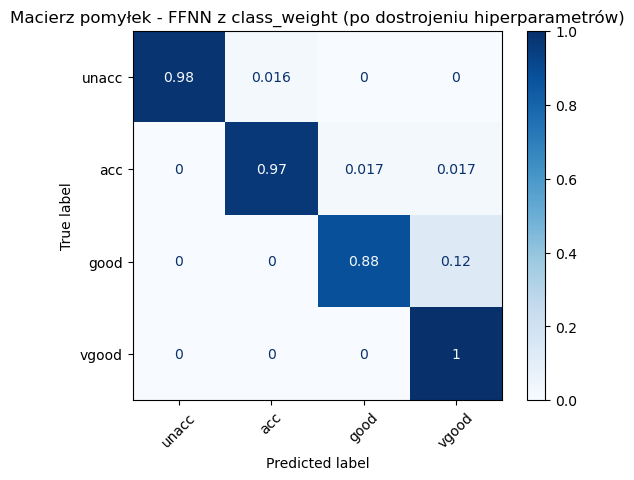

In [16]:
y_test.unique()
# W zbiorze testowym nie mamy klasy z oznaczeniem 1!
y_pred_best_model = best_model.predict(X_test)
mlcm_for_best = multilabel_confusion_matrix(y_test, np.argmax(y_pred_best_model, axis=1))
y_pred_classes_best_model = np.argmax(y_pred_best_model, axis=1)
print("\nRaport klasyfikacji:")
class_names_special = ['unacc', 'acc', 'good', 'vgood']
print(classification_report(y_test, y_pred_classes_best_model, target_names=class_names_special))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_classes_best_model,
    display_labels=class_names_special,
    cmap=plt.cm.Blues,
    normalize='true',
    xticks_rotation= 45
)
cm_display.ax_.set_title("Macierz pomyłek - FFNN z class_weight (po dostrojeniu hiperparametrów)")
plt.show()

Uzyskane rezultaty są bardzo wysokie. Model doskonale radzi sobie z tym zadaniem. Zbiór jest bardzo dobrze separowalny na rozłączne klasy z idealną trafnością. Po dostrojeniu hiperparametrów udało się odseparować niemal idealnie wszyskie dane do poprawnych klas.


# Dodatkowe eksperymenty

Ponieważ klasy są niezbalansowane można spróbować przeprowadzić eksperyment z eliminacją niezbalansowanych klas.

In [17]:
cars_data_without_recom = cars[(cars['pred'] != 2)& (cars['pred'] != 3)]
print(cars_data_without_recom['pred'].value_counts())
y_2 = cars_data_without_recom['pred']
X_2 = cars_data_without_recom.drop('pred', axis=1)


X2_train, X2_temp, y2_train, y2_temp = train_test_split(
    X_2, y_2, test_size=0.3, random_state=42, stratify=y_2
)

X2_val, X2_test, y2_val, y2_test = train_test_split(
    X2_temp, y2_temp, test_size=0.5, random_state=42, stratify=y2_temp
)



print("Kształt zbioru treningowego cech (X_train):", X2_train.shape)
print("Kształt zbioru walidacyjnego cech (X_val):", X2_val.shape)
print("Kształt zbioru testowego cech (X_test):", X2_test.shape)
print("Kształt zbioru treningowego zmiennej docelowej (y_train):", y2_train.shape)
print("Kształt zbioru walidacyjnego zmiennej docelowej (y_val):", y2_val.shape)
print("Kształt zbioru testowego zmiennej docelowej (y_test):", y2_test.shape)


print("\n" + "="*60)
print("ROZKŁAD KLAS W ZBIORACH")
print("="*60)
print("\nCały zbiór:")
print(cars['pred'].value_counts().sort_index())

print("\nZbór treningowy:")
print(y2_train.value_counts().sort_index())

print("\nZbór walidacyjny:")
print(y2_val.value_counts().sort_index())
second_model = keras.Sequential(
    [
        layers.Dense(20, input_shape = (6,), activation='relu'),
        layers.Dense(5, activation='softmax')
    ]
)

second_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


result = second_model.fit(
    X2_train, y2_train, 
    epochs=100, 
    validation_data=(X2_val, y2_val)
)

print("\n" + "="*60)
print("WYNIKI MODELU BAZOWEGO Z CLASS_WEIGHT")
print("="*60)
train_loss, train_acc = second_model.evaluate(X2_train, y2_train, verbose=0)
val_loss, val_acc = second_model.evaluate(X2_val, y2_val, verbose=0)
test_loss, test_acc = second_model.evaluate(X2_test, y2_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

pred
0.0    1210
1.0     384
Name: count, dtype: int64
Kształt zbioru treningowego cech (X_train): (1115, 6)
Kształt zbioru walidacyjnego cech (X_val): (239, 6)
Kształt zbioru testowego cech (X_test): (240, 6)
Kształt zbioru treningowego zmiennej docelowej (y_train): (1115,)
Kształt zbioru walidacyjnego zmiennej docelowej (y_val): (239,)
Kształt zbioru testowego zmiennej docelowej (y_test): (240,)

ROZKŁAD KLAS W ZBIORACH

Cały zbiór:
pred
0.0    1210
1.0     384
2.0      69
3.0      65
Name: count, dtype: int64

Zbór treningowy:
pred
0.0    846
1.0    269
Name: count, dtype: int64

Zbór walidacyjny:
pred
0.0    182
1.0     57
Name: count, dtype: int64
Epoch 1/100
 1/35 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.0000e+00 - loss: 2.9056

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3743 - loss: 1.6762 - val_accuracy: 0.7615 - val_loss: 0.7566
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.7465 - loss: 0.7109 - val_accuracy: 0.7573 - val_loss: 0.6165
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.7475 - loss: 0.5928 - val_accuracy: 0.7490 - val_loss: 0.5574
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.7594 - loss: 0.5341 - val_accuracy: 0.7615 - val_loss: 0.5214
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7767 - loss: 0.4954 - val_accuracy: 0.7699 - val_loss: 0.4958
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.7972 - loss: 0.4668 - val_accuracy: 0.7699 - val_loss: 0.4761
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8095 - loss: 0.4440 - val_accuracy: 0.7908 - val_loss: 0.4602
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8207 - loss: 0.4255 - val_accuracy: 0.7950 - v

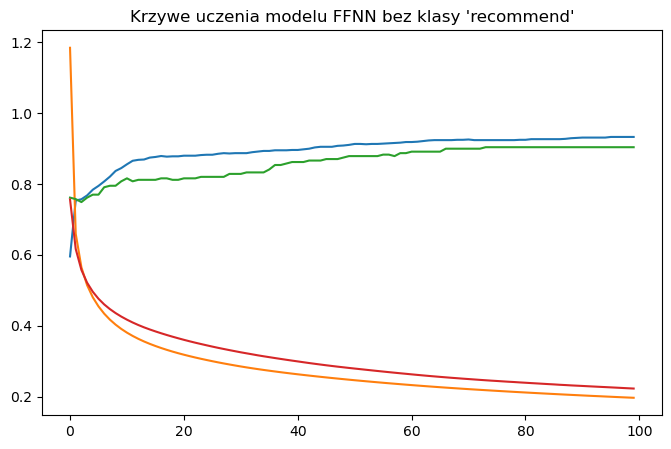

In [18]:
second_model.history = pd.DataFrame(data=result.history)
plt.figure(figsize=(8,5))
plt.plot(second_model.history)
plt.title("Krzywe uczenia modelu FFNN bez klasy 'recommend'")
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Raport klasyfikacji:
              precision    recall  f1-score   support

       unacc       0.95      0.96      0.95       182
         acc       0.86      0.83      0.84        58

    accuracy                           0.93       240
   macro avg       0.90      0.89      0.90       240
weighted avg       0.92      0.93      0.92       240



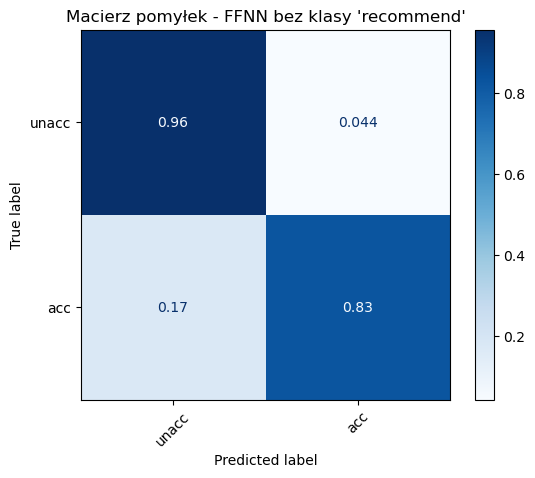

In [19]:
y_pred_second_model = second_model.predict(X2_test)
mlcm_for_best = multilabel_confusion_matrix(y2_test, np.argmax(y_pred_second_model, axis=1))
y_pred_classes_second_model = np.argmax(y_pred_second_model, axis=1)
print("\nRaport klasyfikacji:")
class_names_special = ['unacc', 'acc']
print(classification_report(y2_test, y_pred_classes_second_model, target_names=class_names_special))
cm_display = ConfusionMatrixDisplay.from_predictions(
    y2_test,
    y_pred_classes_second_model,
    display_labels=class_names_special,
    cmap=plt.cm.Blues,
    normalize='true',
    xticks_rotation= 45
)
cm_display.ax_.set_title("Macierz pomyłek - FFNN bez klasy 'recommend'")
# plt.show()

# Cross-Validacja dla ostatniego modelu

W celu bardziej wiarygodnego oszacowania wydajności modelu, zastosowano k-fold cross-validację na zbiorze treningowym i walidacyjnym (bez użycia zbioru testowego, który pozostaje niezmienny do końcowej oceny).

K-FOLD CROSS-VALIDACJA (5 foldów)

[FOLD 1/5]
  Train Accuracy: 0.9834
  Val Accuracy: 0.9422

[FOLD 2/5]
  Train Accuracy: 0.9899
  Val Accuracy: 0.9740

[FOLD 3/5]
  Train Accuracy: 0.9834
  Val Accuracy: 0.9740

[FOLD 4/5]
  Train Accuracy: 0.9696
  Val Accuracy: 0.9710

[FOLD 5/5]
  Train Accuracy: 0.9935
  Val Accuracy: 0.9739

PODSUMOWANIE CROSS-VALIDACJI

Średnia dokładność treningowa: 0.9839 (+/- 0.0081)
Średnia dokładność walidacyjna: 0.9670 (+/- 0.0125)

Dokładności dla każdego foldu:
Fold | Train Acc | Val Acc
-----------------------------------
 1   | 0.9834   | 0.9422
 2   | 0.9899   | 0.9740
 3   | 0.9834   | 0.9740
 4   | 0.9696   | 0.9710
 5   | 0.9935   | 0.9739


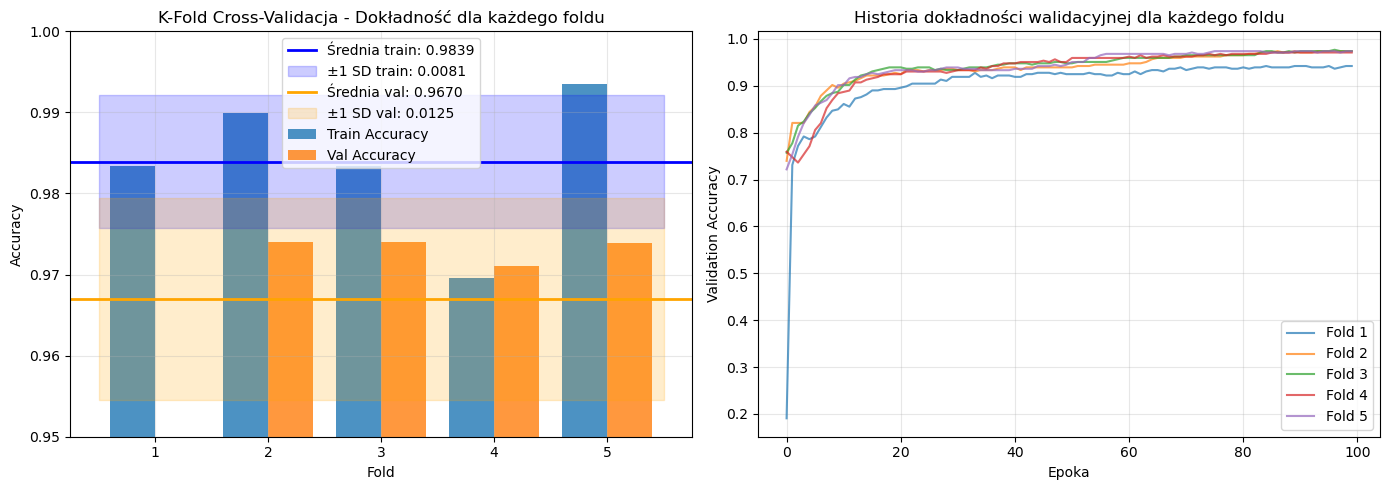

In [22]:
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

y = cars['pred']
X = cars.drop('pred', axis=1)

# Przygotowanie danych - konwersja na float32
X_array = X.astype('float32').values
y_array = y.astype('float32').values

# Ustawienie k-fold cross-validacji (5 foldów)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Zmienne do przechowywania wyników
fold_histories = []
fold_accuracies = {'train': [], 'val': []}
fold_test_accuracies = []

print("="*70)
print("K-FOLD CROSS-VALIDACJA (5 foldów)")
print("="*70)

fold_num = 1

for train_idx, val_idx in kfold.split(X_array):
    print(f"\n[FOLD {fold_num}/5]")
    
    # Podział danych
    X_train_fold, X_val_fold = X_array[train_idx], X_array[val_idx]
    y_train_fold, y_val_fold = y_array[train_idx], y_array[val_idx]
    
    # Obliczenie wag klas dla tego foldu
    classes_fold = np.unique(y_train_fold)
    class_weights_fold = compute_class_weight('balanced', classes=classes_fold, y=y_train_fold)
    class_weight_dict_fold = dict(zip(classes_fold, class_weights_fold))
    
    # Zbudowanie modelu
    keras.utils.set_random_seed(42 + fold_num)
    model_fold = keras.Sequential(
        [
            layers.Dense(80, input_shape=(6,), activation='relu'),
            layers.Dense(10, activation='relu'),
            layers.Dense(5, activation='softmax')
        ]
    )
    
    model_fold.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001775), metrics=['accuracy'])
    
    # Trening modelu
    history_fold = model_fold.fit(
        X_train_fold, y_train_fold,
        epochs=100,
        validation_data=(X_val_fold, y_val_fold),
        class_weight=class_weight_dict_fold,
        verbose=0
    )
    
    # Ocena modelu
    train_loss_fold, train_acc_fold = model_fold.evaluate(X_train_fold, y_train_fold, verbose=0)
    val_loss_fold, val_acc_fold = model_fold.evaluate(X_val_fold, y_val_fold, verbose=0)
    
    fold_accuracies['train'].append(train_acc_fold)
    fold_accuracies['val'].append(val_acc_fold)
    fold_histories.append(history_fold)
    
    print(f"  Train Accuracy: {train_acc_fold:.4f}")
    print(f"  Val Accuracy: {val_acc_fold:.4f}")
    
    fold_num += 1

# Podsumowanie wyników cross-validacji
print("\n" + "="*70)
print("PODSUMOWANIE CROSS-VALIDACJI")
print("="*70)
print(f"\nŚrednia dokładność treningowa: {np.mean(fold_accuracies['train']):.4f} (+/- {np.std(fold_accuracies['train']):.4f})")
print(f"Średnia dokładność walidacyjna: {np.mean(fold_accuracies['val']):.4f} (+/- {np.std(fold_accuracies['val']):.4f})")

print("\nDokładności dla każdego foldu:")
print("Fold | Train Acc | Val Acc")
print("-" * 35)
for i, (train_acc, val_acc) in enumerate(zip(fold_accuracies['train'], fold_accuracies['val']), 1):
    print(f" {i}   | {train_acc:.4f}   | {val_acc:.4f}")

# Wizualizacja wyników cross-validacji
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres dokładności dla każdego foldu
folds = np.arange(1, 6)
axes[0].bar(folds - 0.2, fold_accuracies['train'], width=0.4, label='Train Accuracy', alpha=0.8)
axes[0].bar(folds + 0.2, fold_accuracies['val'], width=0.4, label='Val Accuracy', alpha=0.8)

# Średnia i odchylenie standardowe dla treningu
mean_train = np.mean(fold_accuracies['train'])
std_train = np.std(fold_accuracies['train'])
axes[0].axhline(y=mean_train, color='blue', linestyle='-', linewidth=2, label=f'Średnia train: {mean_train:.4f}')
axes[0].fill_between([0.5, 5.5], mean_train - std_train, mean_train + std_train,
                     alpha=0.2, color='blue', label=f'±1 SD train: {std_train:.4f}')

# Średnia i odchylenie standardowe dla walidacji
mean_val = np.mean(fold_accuracies['val'])
std_val = np.std(fold_accuracies['val'])
axes[0].axhline(y=mean_val, color='orange', linestyle='-', linewidth=2, label=f'Średnia val: {mean_val:.4f}')
axes[0].fill_between([0.5, 5.5], mean_val - std_val, mean_val + std_val,
                     alpha=0.2, color='orange', label=f'±1 SD val: {std_val:.4f}')

axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('K-Fold Cross-Validacja - Dokładność dla każdego foldu')
axes[0].set_xticks(folds)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0.95, 1.0])

# Wykres historii uczenia dla każdego foldu
for i, history in enumerate(fold_histories, 1):
    axes[1].plot(history.history['val_accuracy'], label=f'Fold {i}', alpha=0.7)

axes[1].set_xlabel('Epoka')
axes[1].set_ylabel('Validation Accuracy')
axes[1].set_title('Historia dokładności walidacyjnej dla każdego foldu')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()